## Linear Regression 
- Bike Sharing Case Study

In [1]:
# Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data understanding

In [2]:
# Load data into dataframe

df1 = pd.read_csv("day.csv")
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
df1.shape

(730, 16)

In [4]:
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


## Cleaning the data

In [6]:
# Let's first check for missing values

df1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# No missing values present in data

In [8]:
# Based on our understanding from the data dictionary as well as the data itself we can drop below given irrelevant/redudant
# columns from our dataset

# instant : It's just an id column
# dteday : has date but since same info is captured in other columns such as yr,mnth etc we can drop this
# casual and registered : Our target column cnt is nothing but casual+registered so no need for these columns as 
# we only need to predict overall demand i.e. cnt
# atemp : atemp represents feeling temperature which is almost similar to temp, hence we are dropping it

df1.drop(columns=["instant","dteday"],inplace=True)
df1.drop(columns=['casual','registered','atemp'], inplace=True)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,43.6957,12.522300,1600


In [9]:
# Before performing EDA on this data let's map the values to original value for columns mnth, weekday, season and weathersit
# as we will anyhow have to convert them when creating dummy varibles
# As here the values are nominal and have no order to them

df1.season.replace({1:"spring", 2:"summer", 3:"fall", 4:"winter"}, inplace=True)
df1.mnth.replace({1:"Jan", 2:"Feb", 3:"Mar", 4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}, inplace=True)
df1.weathersit.replace({1:"clear",2:"mist",3:"light_rain",4:"heavy_rain"}, inplace=True)
df1.weekday.replace({0:"sunday",1:"monday",2:"tuesday",3:"wednesday",4:"thursday",5:"friday",6:"saturday"}, inplace=True)


## EDA

In [10]:
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,monday,1,mist,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,tuesday,1,mist,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,wednesday,1,clear,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,thursday,1,clear,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,friday,1,clear,9.305237,43.6957,12.522300,1600


In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   hum         730 non-null    float64
 9   windspeed   730 non-null    float64
 10  cnt         730 non-null    int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 62.9+ KB


<Figure size 864x720 with 0 Axes>

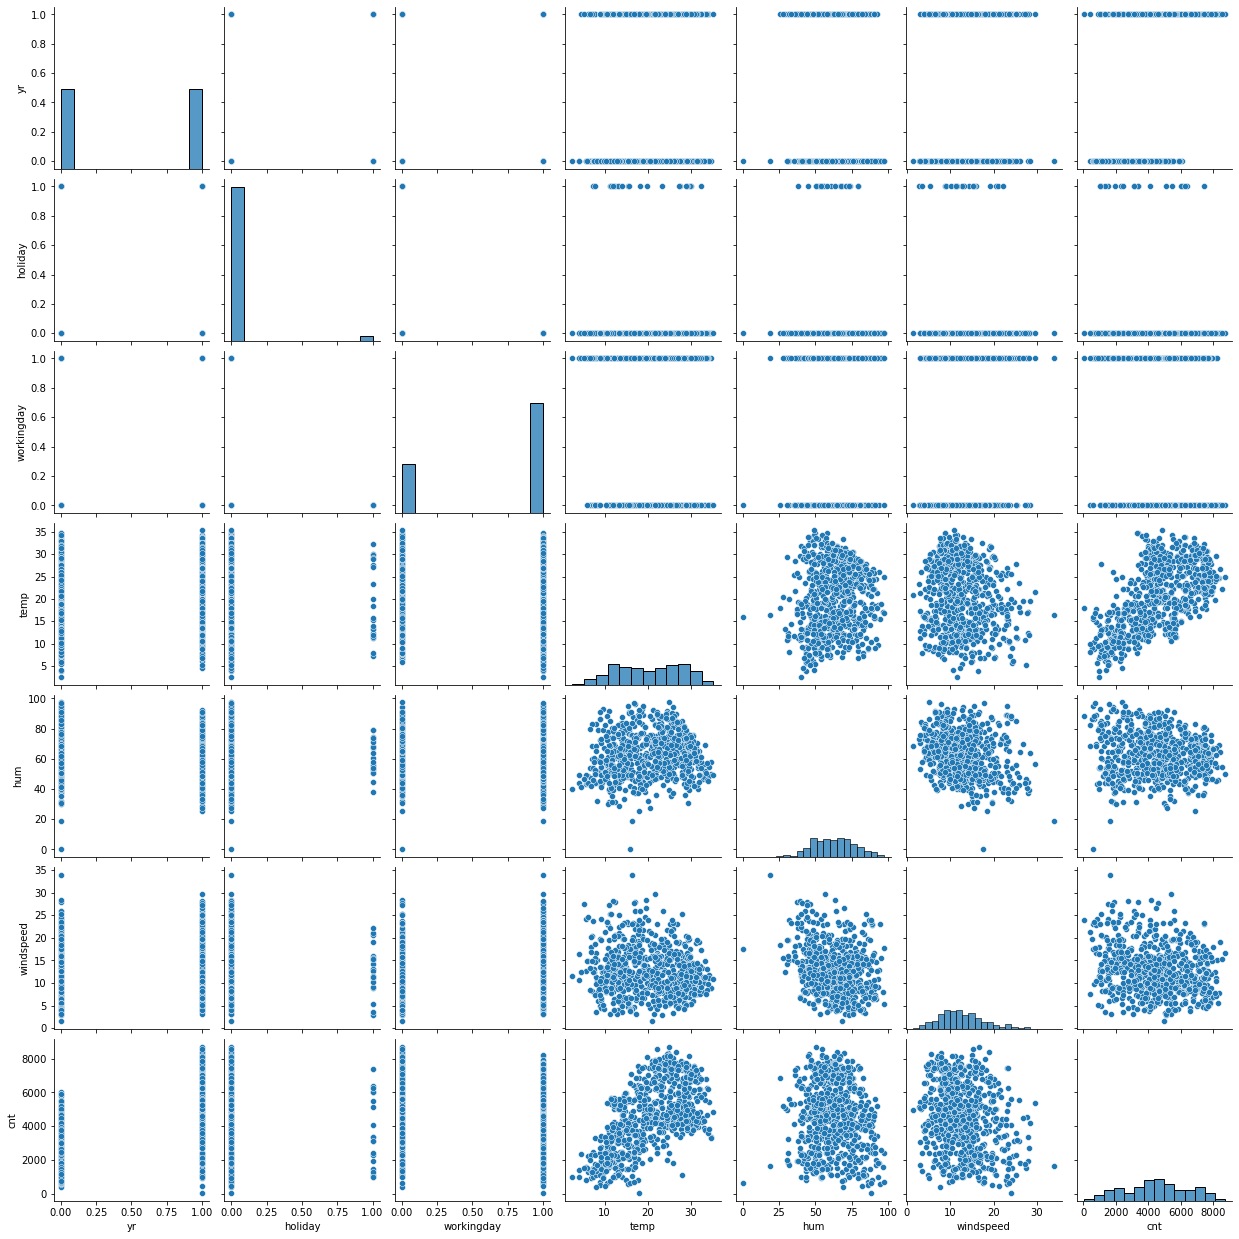

In [12]:
plt.figure(figsize=(12,10))
sns.pairplot(df1)
plt.show()

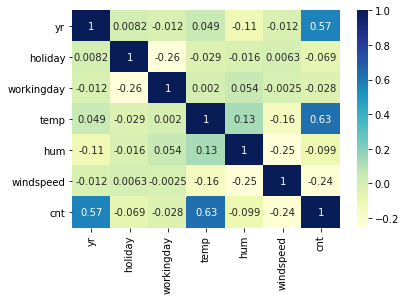

In [13]:
# Corelation heatmap

cor_matrix = df1.corr()
sns.heatmap(cor_matrix, cmap="YlGnBu", annot=True)
plt.show()

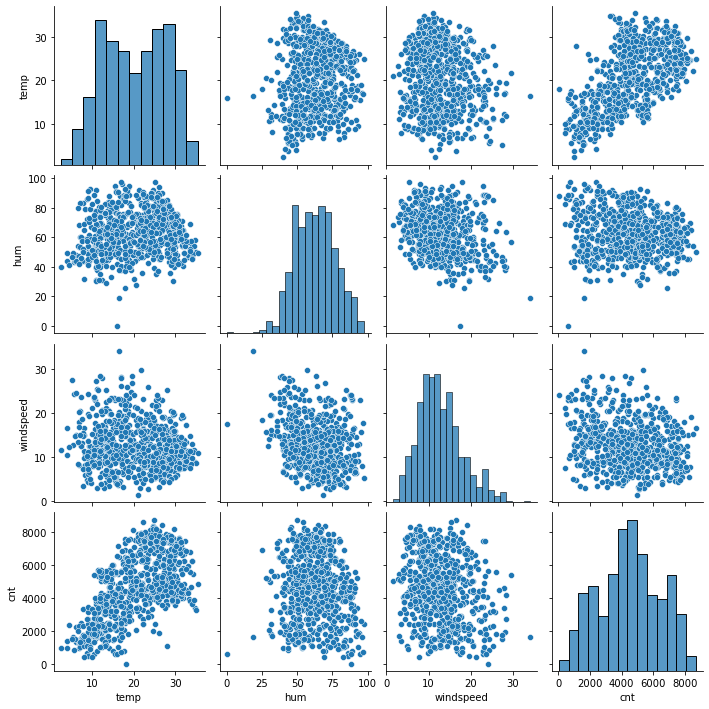

In [14]:
# Let's check only for numerical columns and exclude binary columns

sns.pairplot(data=df1[['temp','hum','windspeed','cnt']])
plt.show()

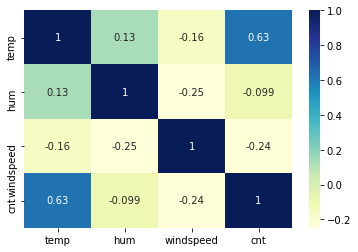

In [15]:
# Corelation heatmap

cor_matrix = df1[['temp','hum','windspeed','cnt']].corr()
sns.heatmap(cor_matrix, cmap="YlGnBu", annot=True)
plt.show()

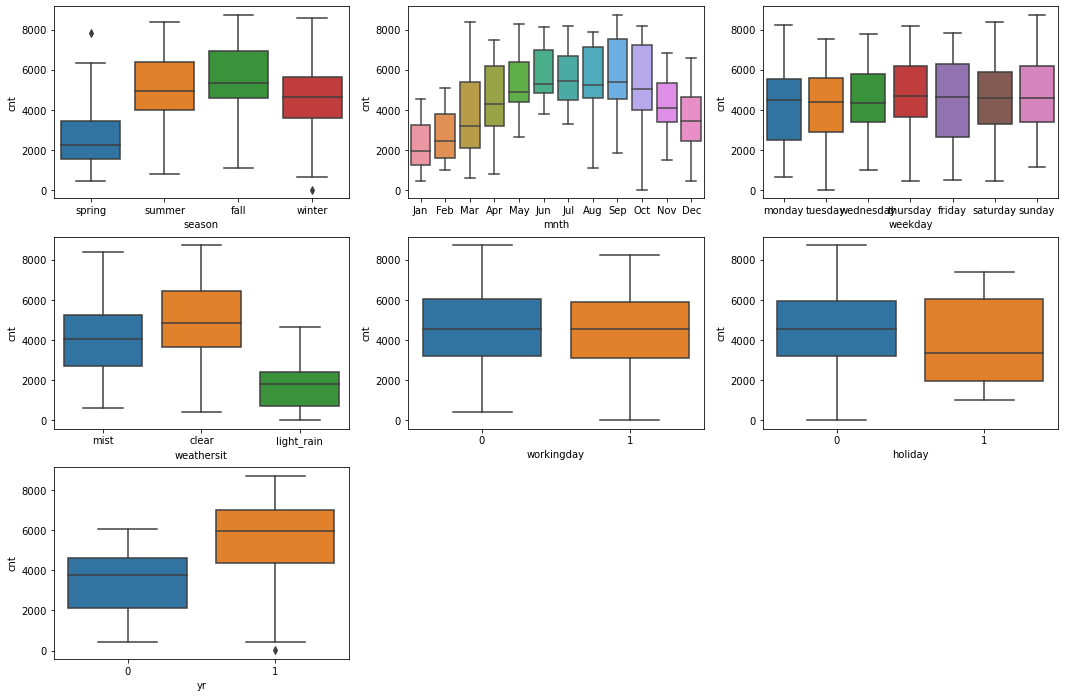

In [16]:
# Let us now look at categorical variables using a boxplot
plt.figure(figsize=(18,12))

plt.subplot(331)
sns.boxplot(data=df1,x='season',y = 'cnt')
plt.subplot(332)
sns.boxplot(data=df1,x='mnth',y = 'cnt')
plt.subplot(333)
sns.boxplot(data=df1,x='weekday',y = 'cnt')
plt.subplot(334)
sns.boxplot(data=df1,x='weathersit',y = 'cnt')
plt.subplot(335)
sns.boxplot(data=df1,x='workingday',y = 'cnt')
plt.subplot(336)
sns.boxplot(data=df1,x='holiday',y = 'cnt')
plt.subplot(337)
sns.boxplot(data=df1,x='yr',y = 'cnt')

plt.show()

## Insights from EDA
 - season: Spring and Fall seasons have the most bookings.
 - mnth: Months from June to October have higher bookings as compared to rest of the months this also corresponds with the season variable.
 - weathersit: Mist and Clear weather situations cleary show a good trend with higher bike bookings
 - holiday: Most of the bike bookings were happening during non holidays.
 - yr: There has been a significant increase in bookings for year 2019 which indicates positive growth for the bike sharing market.
 
### From correlation matrix
 - Temp, yr and windspeed have good correation with target variable with temp having highest corelation of 0.63

## Creating Dummy varibles

In [17]:
# Creating dummy varibles for Season,mnth,weekday and weathersit

dummy1 = pd.get_dummies(df1['season'],drop_first=True)
dummy2 = pd.get_dummies(df1['mnth'],drop_first=True)
dummy3 = pd.get_dummies(df1['weekday'],drop_first=True)

# There is no situation where there is heavy rain in dataset, so not adding drop_first to retain this condition
dummy4 = pd.get_dummies(df1['weathersit'])


In [18]:
# Concatenating original dataset with new dummy dataset
df1 = pd.concat([df1,dummy1,dummy2,dummy3,dummy4], axis=1)
df1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,...,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,clear,light_rain,mist
0,spring,0,Jan,0,monday,1,mist,14.110847,80.5833,10.749882,...,0,1,0,0,0,0,0,0,0,1
1,spring,0,Jan,0,tuesday,1,mist,14.902598,69.6087,16.652113,...,0,0,0,0,0,1,0,0,0,1
2,spring,0,Jan,0,wednesday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,0,0,0,1,1,0,0
3,spring,0,Jan,0,thursday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,1,0,0,1,0,0
4,spring,0,Jan,0,friday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,1,0,0


In [19]:
#Dropping original columns 

df1.drop(columns=['season','mnth','weekday','weathersit'], inplace=True)
df1.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,clear,light_rain,mist
0,0,0,1,14.110847,80.5833,10.749882,985,1,0,0,...,0,1,0,0,0,0,0,0,0,1
1,0,0,1,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,1,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          730 non-null    int64  
 1   holiday     730 non-null    int64  
 2   workingday  730 non-null    int64  
 3   temp        730 non-null    float64
 4   hum         730 non-null    float64
 5   windspeed   730 non-null    float64
 6   cnt         730 non-null    int64  
 7   spring      730 non-null    uint8  
 8   summer      730 non-null    uint8  
 9   winter      730 non-null    uint8  
 10  Aug         730 non-null    uint8  
 11  Dec         730 non-null    uint8  
 12  Feb         730 non-null    uint8  
 13  Jan         730 non-null    uint8  
 14  Jul         730 non-null    uint8  
 15  Jun         730 non-null    uint8  
 16  Mar         730 non-null    uint8  
 17  May         730 non-null    uint8  
 18  Nov         730 non-null    uint8  
 19  Oct         730 non-null    u

## Preparing data for Model

In [21]:
# Lets start preparing the data for modeling
# Need to perform train test split
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [22]:
# Scaling the features
# We will use min-max scaler to perform scaling

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [23]:
# we will be applying min max scaler to all variables except dummy and yes/no(0/1) variables
# since this is train data we will perform fit tansform

numerical_var = ['temp','hum','windspeed','cnt']

df_train[numerical_var] = scaler.fit_transform(df_train[numerical_var])

df_train.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,clear,light_rain,mist
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,...,0,0,0,0,0,0,1,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,0.204096,1,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [24]:
# seperating independent and dependent variable

y_train = df_train.pop('cnt')
X_train = df_train

In [25]:
X_train.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,clear,light_rain,mist
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,0,0,0,0,0,0,1,1,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,1,0.245101,0.498067,0.663106,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


In [26]:
# Our data has been seperated now lets start building the model
# In order to reduce the number of independent variable we will use RFE 
# Importing libraries for RFE and Linear Regression as well as statsmodels for building model

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [27]:
# Fitting with linear regression model
# We will be running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train,y_train)

In [28]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 13),
 ('winter', True, 1),
 ('Aug', False, 12),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 11),
 ('May', False, 3),
 ('Nov', True, 1),
 ('Oct', False, 10),
 ('Sep', True, 1),
 ('monday', False, 7),
 ('saturday', False, 5),
 ('sunday', False, 6),
 ('thursday', False, 15),
 ('tuesday', False, 8),
 ('wednesday', False, 9),
 ('clear', True, 1),
 ('light_rain', True, 1),
 ('mist', True, 1)]

In [29]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'winter', 'Dec',
       'Jan', 'Jul', 'Nov', 'Sep', 'clear', 'light_rain', 'mist'],
      dtype='object')

In [30]:
# Creating X_train_rfe dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [31]:
# Adding a constant variable 
 
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()

In [32]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          7.80e-189
Time:                        14:19:27   Log-Likelihood:                 511.10
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     495   BIC:                            -928.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1971      0.027      7.343      0.0

In [33]:
# None of the variables above have a p-value greater than 0.05, which means all of them are statistically significant
# also the differnce beteen R square and agj r square is very less which also is a good sign
# let's now look at VIF values to see if there is any multicolinerity between variables

In [34]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,clear,inf
14,light_rain,inf
15,mist,inf
3,temp,3.48
6,spring,2.75
7,winter,2.34
4,hum,1.90
11,Nov,1.70
9,Jan,1.64
8,Dec,1.45


In [35]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('clear', 1)

In [36]:
# Build a second fitted model

X_train_lm = sm.add_constant(X)
lm2 = sm.OLS(y_train, X_train_lm).fit()

In [37]:
# Print the summary of the model

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          7.80e-189
Time:                        14:19:27   Log-Likelihood:                 511.10
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     495   BIC:                            -928.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3665      0.032     11.546      0.0

In [38]:
# Removing const column so it dosen't show up in VIF calculation 

X = X.drop(['const'], axis=1)

In [39]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,24.57
2,temp,16.83
4,windspeed,4.07
6,winter,2.97
5,spring,2.94
13,mist,2.26
0,yr,2.07
10,Nov,1.82
8,Jan,1.74
7,Dec,1.54


In [40]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('hum', 1)

In [41]:
# Build a third fitted model

X_train_lm2 = sm.add_constant(X)
lm3 = sm.OLS(y_train, X_train_lm2).fit()

In [42]:
# Print the summary of the model

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.9
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          1.08e-186
Time:                        14:19:27   Log-Likelihood:                 503.24
No. Observations:                 510   AIC:                            -978.5
Df Residuals:                     496   BIC:                            -919.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2893      0.025     11.427      0.0

In [43]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.67
3,windspeed,4.05
5,winter,2.54
4,spring,2.36
0,yr,2.06
9,Nov,1.80
7,Jan,1.65
12,mist,1.53
6,Dec,1.46
8,Jul,1.36


In [44]:
# Dropping temp due to high VIF and checking model performance
X1 = X
X = X.drop('temp', 1)

In [45]:
# Build a fourth fitted model

X_train_lm3 = sm.add_constant(X)
lm4 = sm.OLS(y_train, X_train_lm3).fit()

In [46]:
# Print the summary of the model

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     154.1
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          7.86e-159
Time:                        14:19:27   Log-Likelihood:                 434.31
No. Observations:                 510   AIC:                            -842.6
Df Residuals:                     497   BIC:                            -787.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5678      0.013     42.379      0.0

In [47]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.63
4,winter,2.52
3,spring,2.30
8,Nov,1.78
0,yr,1.76
6,Jan,1.64
11,mist,1.46
5,Dec,1.45
9,Sep,1.12
7,Jul,1.10


In [48]:
# Dropping winter due to high p value and checking model performance

X = X.drop('winter', 1)

In [49]:
# Build a fifth fitted model

X_train_lm4 = sm.add_constant(X)
lm5 = sm.OLS(y_train, X_train_lm4).fit()

In [50]:
# Print the summary of the model

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     168.4
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          6.64e-160
Time:                        14:19:28   Log-Likelihood:                 434.19
No. Observations:                 510   AIC:                            -844.4
Df Residuals:                     498   BIC:                            -793.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5696      0.013     44.153      0.0

In [51]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.54
3,spring,2.12
0,yr,1.74
5,Jan,1.62
10,mist,1.44
7,Nov,1.16
8,Sep,1.11
4,Dec,1.10
6,Jul,1.09
1,holiday,1.06


In [52]:
# Dropping Jul due to high p value and checking model performance

X = X.drop('Jul', 1)

In [53]:
# Build a sixth fitted model

X_train_lm5 = sm.add_constant(X)
lm6 = sm.OLS(y_train, X_train_lm5).fit()

In [54]:
# Print the summary of the model

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     185.4
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          5.82e-161
Time:                        14:19:28   Log-Likelihood:                 433.99
No. Observations:                 510   AIC:                            -846.0
Df Residuals:                     499   BIC:                            -799.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5719      0.012     46.206      0.0

In [55]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,2.47
3,spring,2.09
0,yr,1.72
5,Jan,1.62
9,mist,1.44
6,Nov,1.15
7,Sep,1.11
4,Dec,1.10
1,holiday,1.06
8,light_rain,1.06


In [56]:
# Since we saw a significant drop in model performance after dropping 'temp' column.
# Let's add only the temp variable back to check model performance, as it has very high corelation with target column

X = X1
X = X.drop(['winter','Jul'], 1)

In [57]:
# Build a seventh fitted model

X_train_lm6 = sm.add_constant(X)
lm7 = sm.OLS(y_train, X_train_lm6).fit()

In [58]:
# Print the summary of the model

print(lm7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     215.8
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          1.76e-181
Time:                        14:19:28   Log-Likelihood:                 485.29
No. Observations:                 510   AIC:                            -946.6
Df Residuals:                     498   BIC:                            -895.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3564      0.023     15.285      0.0

In [59]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,3.93
2,temp,3.79
4,spring,2.20
0,yr,2.05
6,Jan,1.63
10,mist,1.49
8,Sep,1.17
7,Nov,1.16
5,Dec,1.10
1,holiday,1.06


In [60]:
# Dropping Nov due to high p value and checking model performance

X = X.drop('Nov', 1)

In [61]:
# Build a eight fitted model

X_train_lm7 = sm.add_constant(X)
lm8 = sm.OLS(y_train, X_train_lm7).fit()

In [62]:
# Print the summary of the model

print(lm8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     237.6
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          1.44e-182
Time:                        14:19:28   Log-Likelihood:                 485.02
No. Observations:                 510   AIC:                            -948.0
Df Residuals:                     499   BIC:                            -901.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3486      0.021     16.877      0.0

In [63]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.76
3,windspeed,3.76
4,spring,2.14
0,yr,2.03
6,Jan,1.63
9,mist,1.49
7,Sep,1.16
5,Dec,1.09
8,light_rain,1.06
1,holiday,1.03


In [64]:
# Dropping Dec due to high p value and checking model performance

X = X.drop('Dec', 1)

In [65]:
# Build a ninth fitted model

X_train_lm8 = sm.add_constant(X)
lm9 = sm.OLS(y_train, X_train_lm8).fit()

In [66]:
# Print the summary of the model

print(lm9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     262.9
Date:                Sat, 09 Jul 2022   Prob (F-statistic):          3.00e-183
Time:                        14:19:28   Log-Likelihood:                 483.75
No. Observations:                 510   AIC:                            -947.5
Df Residuals:                     500   BIC:                            -905.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3357      0.019     17.659      0.0

In [67]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.76
3,windspeed,3.73
4,spring,2.11
0,yr,2.03
5,Jan,1.60
8,mist,1.47
6,Sep,1.16
7,light_rain,1.06
1,holiday,1.03


In [68]:
# The 9th model seems to be the best as it has VIF values less than 4 as well as no insignificant columns
# The number of features are 9 with an R square value of 0.826 which is not far off from our first model
# The difference between R and Adj R is also very less

## Residual analysis of train data

In [69]:
y_train_price = lm9.predict(X_train_lm8)

Text(0.5, 0, 'Errors')

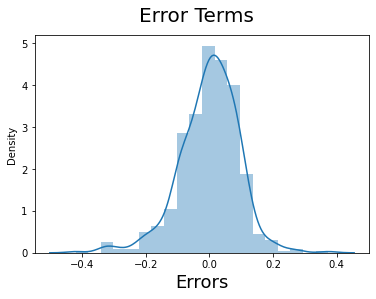

In [70]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [71]:
# Errors are normally distribured here with mean 0 which is good

## Let's make predictions using final model

In [72]:
# We start with scaling the test variables
numerical_var = ['temp','hum','windspeed','cnt']

df_test[numerical_var] = scaler.transform(df_test[numerical_var])

In [73]:
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,winter,...,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,clear,light_rain,mist
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,...,0.086758,0.118721,0.173516,0.155251,0.141553,0.123288,0.155251,0.652968,0.027397,0.319635
std,0.500722,0.188034,0.481313,0.233698,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,...,0.282125,0.324202,0.379560,0.362974,0.349389,0.329520,0.362974,0.477117,0.163612,0.467403
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [74]:
# seperating independent and dependent variable

y_test = df_test.pop('cnt')
X_test = df_test

In [75]:
X_test.head()

,yr,holiday,workingday,temp,hum,windspeed,spring,summer,winter,Aug,...,Sep,monday,saturday,sunday,thursday,tuesday,wednesday,clear,light_rain,mist
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
299,0,0,0,0.511964,0.837699,0.334206,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,0,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0


In [76]:
# Adding constant variable to test dataframe

X_test_lm = sm.add_constant(X_test)

In [77]:
# Choosing columns used in model lm8 

X_test_lm = X_test_lm[list(X_train_lm8.columns)]

In [78]:
X_test_lm.head()

,const,yr,holiday,temp,windspeed,spring,Jan,Sep,light_rain,mist
184,1.0,0,1,0.831783,0.084219,0,0,0,0,1
535,1.0,1,0,0.901354,0.153728,0,0,0,0,0
299,1.0,0,0,0.511964,0.334206,0,0,0,0,1
221,1.0,0,0,0.881625,0.339570,0,0,0,0,0
152,1.0,0,0,0.817246,0.537414,0,0,0,0,0


In [79]:
# Making predictions using the third model

y_pred_lm = lm9.predict(X_test_lm)

## Model Evaluation

Text(0, 0.5, 'y_pred')

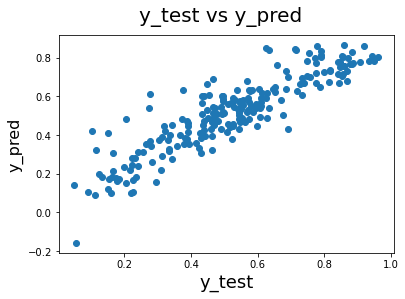

In [80]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_lm)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

In [81]:
# Checking R2 score of our test model

from sklearn.metrics import r2_score

r2 = r2_score(y_test,y_pred_lm)
print(f"R2 score of test model is {r2}")

R2 score of test model is 0.7955794154350745


In [82]:
# Checking Adj R2 score of our test model
# n is number of rows in X

n = X_test_lm.shape[0]
# Number of features p

p = X_test_lm.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
print(f"Adjusted R2 score of test model is {adjusted_r2}")

Adjusted R2 score of test model is 0.7857515027156069


## Final model equation
cnt = 0.3357 + (0.2374 x yr) - (0.0905 x holiday) + (0.3304 x temp) - (0.1577 x windspeed) - (0.1343 x spring) - 
(0.0571 x jan) + (0.0695 x Sep) - (0.2828 x light_rain) - (0.0783 x mist)

## Predictor variables
 - yr
 - holiday
 - temp
 - windspeed
 - spring
 - jan
 - Sep
 - light_rain
 - mist